# Instagram Reach Analysis using Python

In [17]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor

In [24]:
data = pd.read_csv("Instagram.csv", encoding = "latin1")
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  Comments  Shares  Likes  Profile Visits  Follows                                                                                                                                                                                                     Caption                                                                                                                                                                                                                                                                                                                                                                                Hashtags
0         3920       2586           1028           619          56     98         9       5    162              35        2                                                                                            Here are some of the most important data visualizations that every Financial Data

In [25]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [5]:
data = data.dropna()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


## Analyzing Instagram Reach

/tmp/ipykernel_22848/1415715992.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




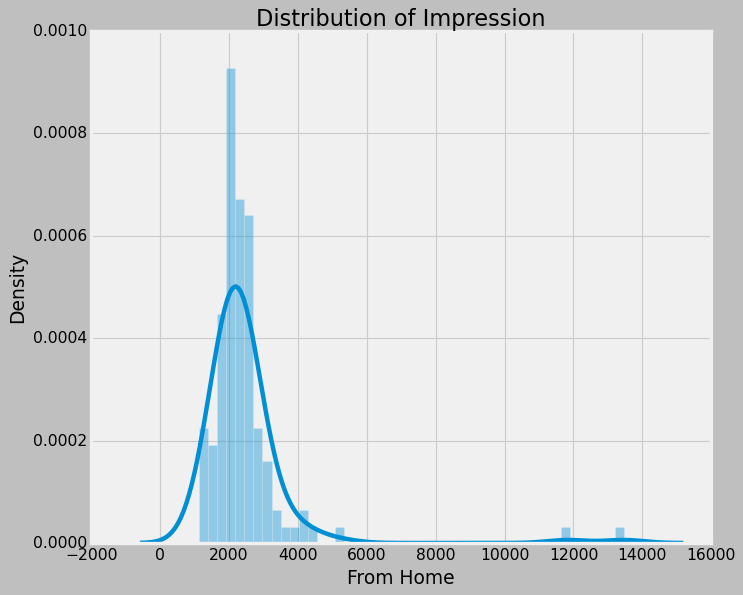

In [27]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impression")
sns.distplot(data["From Home"])
plt.show()

/tmp/ipykernel_22848/324734107.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




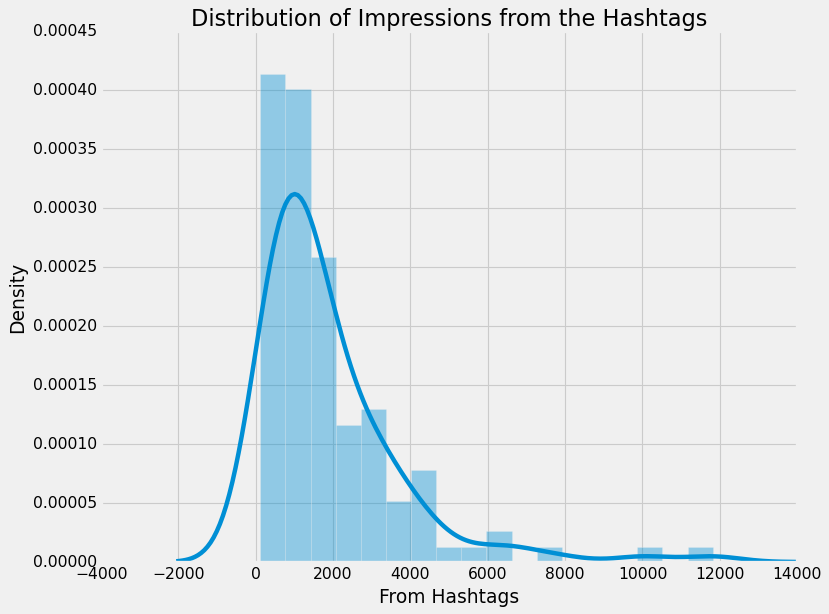

In [29]:
#Here is what is done
plt.figure(figsize = (10, 8))
plt.title("Distribution of Impressions from the Hashtags")
sns.distplot(data["From Hashtags"])
plt.show()

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


/tmp/ipykernel_22848/3711255542.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




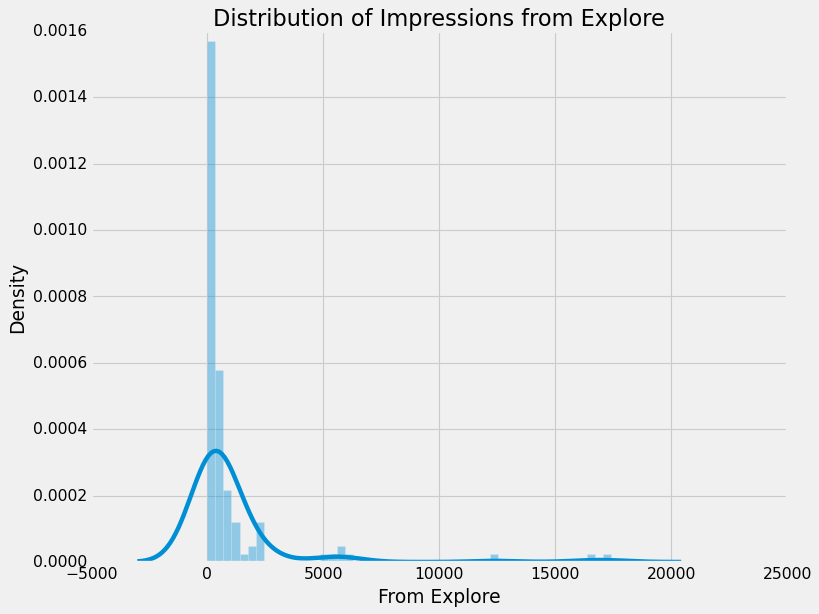

In [30]:
plt.figure(figsize = (10, 8))
plt.title("Distribution of Impressions from Explore")
sns.distplot(data["From Explore"])
plt.show()

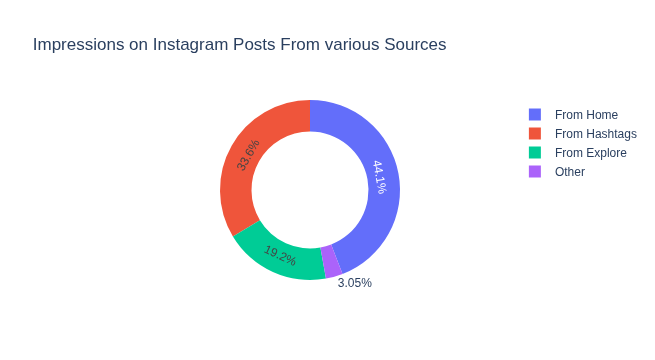

In [31]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ["From Home", "From Hashtags", "From Explore", "Other"]
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels,
            title = "Impressions on Instagram Posts From various Sources",
            hole = 0.65)
fig.show()

## Analyse Content

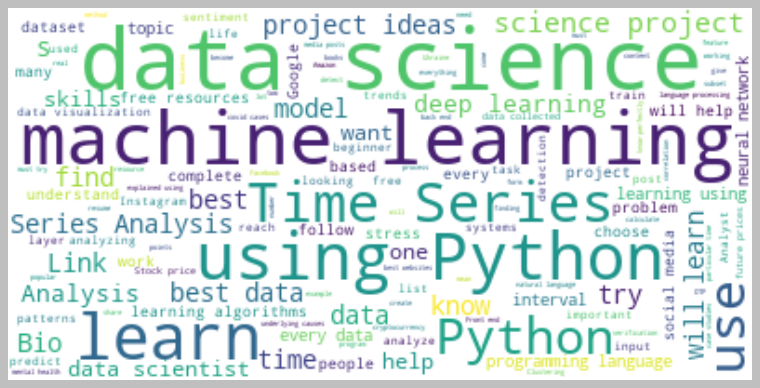

In [33]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()          

### Analyse the most used Hashtags in my Instagram posts


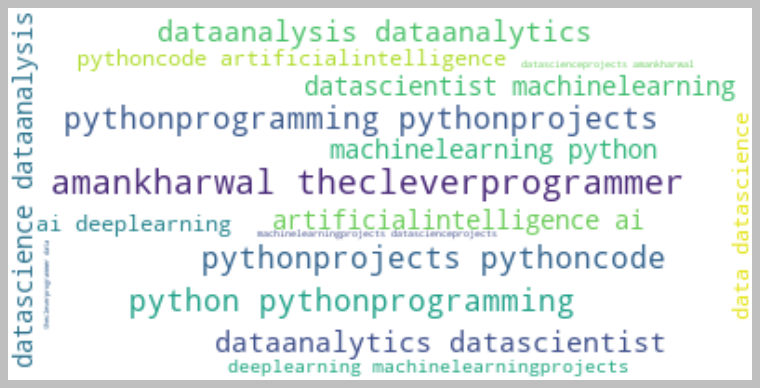

In [34]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Analyzing Relationships Other

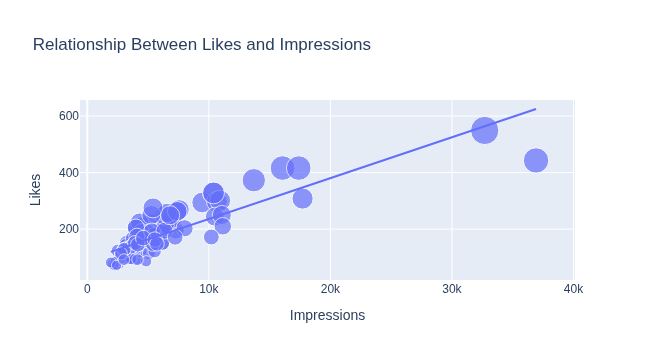

In [35]:
figure = px.scatter(data_frame = data, x ="Impressions",
                   y = "Likes", size="Likes", trendline = "ols",
                   title = "Relationship Between Likes and Impressions")
figure.show()

## Relationship betwwen the number of Comments and the Impressions for the posts

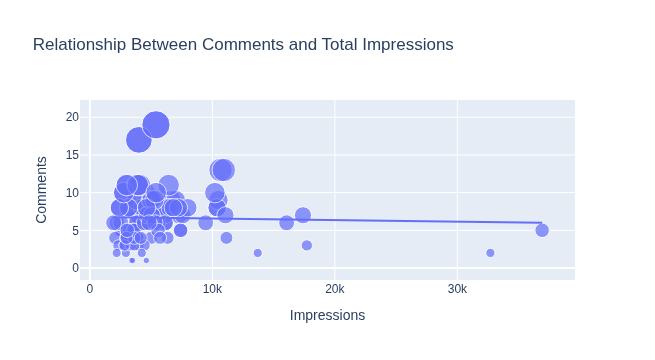

In [36]:
figure = px.scatter(data_frame=data, x="Impressions",
                   y="Comments", size="Comments", trendline="ols",
                   title="Relationship Between Comments and Total Impressions")
figure.show()

### Relationship between the number of shares and the Impressions

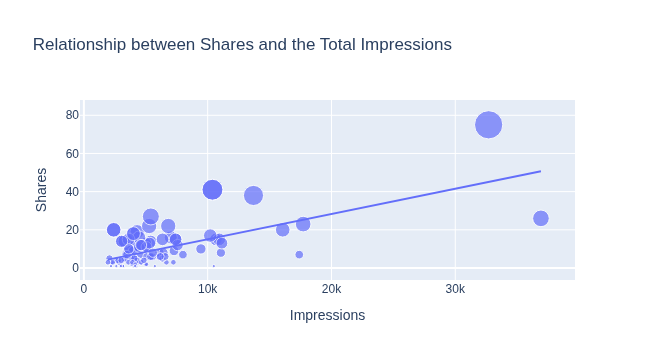

In [39]:
figure = px.scatter(data_frame = data, x = "Impressions",
                   y = "Shares", size = "Shares", trendline = "ols",
                    title = "Relationship between Shares and the Total Impressions")
figure.show()
                    

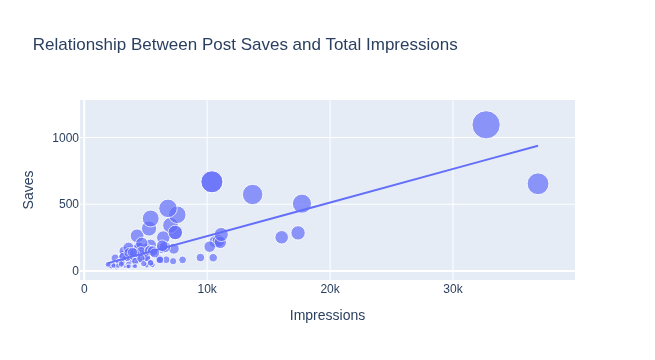

In [40]:
figure = px.scatter(data_frame = data, x = "Impressions",
                   y= "Saves", size = "Saves", trendline = "ols",
                   title = "Relationship Between Post Saves and Total Impressions")
figure.show()

In [46]:
correlation  = data.select_dtypes(exclude=object).corr()
print(correlation["Impressions"]).sort_values(ascending=False)

Impressions       1.000000
From Home         0.844698
From Hashtags     0.560760
From Explore      0.893607
From Other        0.592960
Saves             0.779231
Comments         -0.028524
Shares            0.634675
Likes             0.849835
Profile Visits    0.760981
Follows           0.889363
Name: Impressions, dtype: float64


AttributeError: 'NoneType' object has no attribute 'sort_values'

## Analyze the Conversion Rate

#### Coversion rate can be defined as the number of followers that you get from the number of visits to the instagram profile

In [48]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum() * 100)
print(conversion_rate)

41.00265604249668


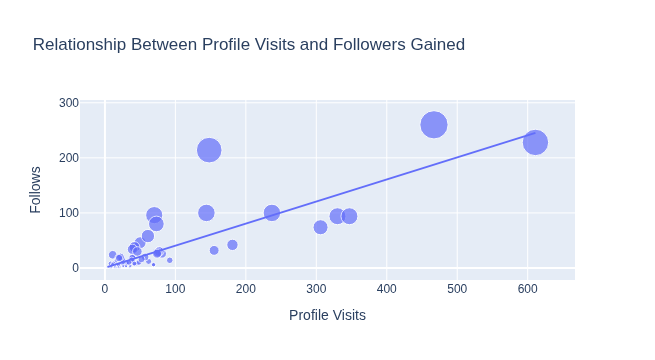

In [50]:
# Total profile visits and the number of followers gained from the profile visits
figure = px.scatter(data_frame=data, x = "Profile Visits",
                   y="Follows", size = "Follows", trendline = "ols",
                   title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

## Instagram Reach Prediction Model

In [51]:
x = np.array(data[["Likes","Saves","Comments","Shares",
                   "Profile Visits", "Follows"]])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                               test_size=0.2,
                                               random_state=42)

In [52]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8543604204145687

In [53]:
#features = [["Likes", "Saves", "Comments", "Shares", "Profile Visits", "Follows"]]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([11002.6384923])